In [302]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [455]:
df2020 = pd.read_csv("PFR_2020_Injuries.csv", encoding='latin-1')
df2019 = pd.read_csv("PFR_2019_Injuries.csv", encoding='latin-1')

In [456]:
# Concatenate
df_all = pd.concat([df2019, df2020], ignore_index=True)
df_all = df_all.reset_index(drop=True)
print(df_all.shape)
print(df_all["Season"].value_counts())

(73040, 39)
Season
2020    38112
2019    34928
Name: count, dtype: int64


In [457]:
df2020_filtered = df2020[
    (df2020["Injury_Type"] != "Not Injury Related") &
    (df2020["Injury_Type"] != "Non-Football Illness") &
    (df2020["Injury_Type"] != "Illness")
]


In [458]:
df2020_positionFiltered = df2020_filtered[
    (df2020_filtered["Position"] == "RB") |
    (df2020_filtered["Position"] == "QB") |
    (df2020_filtered["Position"] == "WR") |
    (df2020_filtered["Position"] == "TE") 
]

In [459]:
df2020_positionFiltered = df2020_filtered

In [460]:
df2020_positionFiltered["Position"].value_counts()

Position
DB    5481
OL    4980
DL    4285
LB    3849
WR    3276
RB    2047
TE    1929
ST    1656
QB    1432
FB     289
Name: count, dtype: int64

## Project idea
### Given a player X, check if they have been injured: If so, predict how many weeks they will be out and their performance 

In [461]:
(394+213+74+56+47)/(7900+394+213+74+56+47) * 100

9.028097650852143

In [462]:
df2020_positionFiltered["Game_Designation"].value_counts()

Game_Designation
Healthy                                  29218
Injured Reserve                           4699
Questionable                              1333
C19 Opt-Out                               1149
Out                                        758
C19                                        531
Doubtful                                   144
Physically Unable to Perform               109
reserve/future                              28
reserve/injured from waived/injured          3
Suspended                                    2
r/pup from w/fp; does not count on 90        1
Name: count, dtype: int64

### For each player, count # of weeks they were inactive due to an injury

### How does each injury affect snap score. How does beign healthy constantyl help snap score

### Loop through each unique value name. For each name, look at the mini dataset and see the # of weeks they were injured for 

In [463]:
df2020_positionFiltered["Age_Start_Season"]

0        27
1        27
2        27
3        27
4        27
         ..
38107    27
38108    27
38109    27
38110    27
38111    27
Name: Age_Start_Season, Length: 37975, dtype: int64

In [464]:
unique_names = df2020_positionFiltered["Name"].unique()


In [465]:
df2020_positionFiltered["Injury_Type"].value_counts()

Injury_Type
C19 Opt-Out        1149
C19                 531
Knee                374
Ankle               317
Hamstring           283
Shoulder            186
Calf                138
Groin               138
Concussion          135
Foot                101
Back                 88
Hip                  65
Neck                 63
Quadricep            50
Ribs                 39
Thigh                37
Toe                  33
Abdomen              23
Elbow                20
Hand                 17
Rib                  14
Chest                14
Pectoral             14
Wrist                14
Achilles             13
Finger               12
Shin                 11
Right Shoulder       10
Right Groin           8
Thumb                 7
Right Thumb           5
Oblique               4
Core                  3
Biceps                3
Throat                3
Hamstrings            3
Stinger               3
Right Quadricep       2
Liver                 2
Triceps               2
Left Thumb            2
Left

In [466]:
df2020_positionFiltered[df2020_positionFiltered["Injury_Type"] == "Hamstring"].sort_values(by="Week")

,Unnamed: 0,name_abbr,Name,team_abbr,Team,Season,Week,Active_Inactive,Game_Designation,Injury_Type,...,gsis_id,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,headshot_url,Birthday,Season_Start,Age_Start_Season
36959,36960,V.Butler,Vernon Butler,BUF,Buffalo Bills,2020,1.0,Out,Questionable,Hamstring,...,00-0032967,2971883.0,73e84e89-4bd3-480e-b862-68502c8c295a,29264.0,10931.0,10664.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,6/14/1994,9/1/2020,26
5824,5825,C.Davis,Corey Davis,TEN,Tennessee Titans,2020,1.0,Active,Questionable,Hamstring,...,00-0033871,3042778.0,e21e9081-44aa-464b-8d3e-83918d48b921,30118.0,11733.0,11760.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,1/11/1995,9/1/2020,25
6042,6043,C.Gillaspia,Cullen Gillaspia,HOU,Houston Texans,2020,1.0,Out,Questionable,Hamstring,...,00-0035304,3122143.0,1731325a-0303-4a56-81f5-3c4a588cf0d6,32052.0,13988.0,38844.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,5/12/1995,9/1/2020,25
33464,33465,S.Thomas-Oliver,Stantley Thomas-Oliver,CAR,Carolina Panthers,2020,1.0,Out,Questionable,Hamstring,...,00-0036315,4046353.0,6c162e60-0d39-46b4-bd8d-d2f3c6d6c7e5,32891.0,14707.0,NaN,https://a.espncdn.com/combiner/i?img=/i/headsh...,6/4/1998,9/1/2020,22
29823,29824,P.Williams,P.J. Williams,NO,New Orleans Saints,2020,1.0,Out,Questionable,Hamstring,...,00-0032059,2977661.0,36538da8-9ac7-4f7d-beb4-8b773da4a080,28466.0,10409.0,9511.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,6/1/1993,9/1/2020,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,32522,S.Griffin,Shaquem Griffin,SEA,Seattle Seahawks,2020,18.0,Active,Questionable,Hamstring,...,00-0034755,3054029.0,7c7d286f-5c3f-4fe1-864d-9351499bd530,31111.0,12829.0,50657.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,7/20/1995,9/1/2020,25
32520,32521,S.Griffin,Shaquill Griffin,SEA,Seattle Seahawks,2020,18.0,Active,Questionable,Hamstring,...,00-0033926,3054026.0,dd7640e6-d81d-4605-b900-451bf40e5bd6,30203.0,12015.0,11845.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,7/20/1995,9/1/2020,25
16365,16366,J.Conklin,Jack Conklin,CLE,Cleveland Browns,2020,19.0,Active,Questionable,Hamstring,...,00-0033057,2979534.0,0e7d7ddc-6515-4034-8857-5ab9da6b7c25,29242.0,10977.0,10642.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,8/17/1994,9/1/2020,26
10936,10937,D.Njoku,David Njoku,CLE,Cleveland Browns,2020,19.0,Active,Questionable,Hamstring,...,00-0033885,3123076.0,8f86fcea-90e8-49ea-bc78-5c7659313e57,30142.0,11734.0,11784.0,https://a.espncdn.com/combiner/i?img=/i/headsh...,7/10/1996,9/1/2020,24


In [467]:
df2020_positionFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37975 entries, 0 to 38111
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               37975 non-null  int64  
 1   name_abbr                37975 non-null  object 
 2   Name                     37975 non-null  object 
 3   team_abbr                37975 non-null  object 
 4   Team                     37975 non-null  object 
 5   Season                   37975 non-null  int64  
 6   Week                     37460 non-null  float64
 7   Active_Inactive          37975 non-null  object 
 8   Game_Designation         37975 non-null  object 
 9   Injury_Type              3941 non-null   object 
 10  Position                 29224 non-null  object 
 11  Started                  29224 non-null  object 
 12  Total.Snaps              37975 non-null  int64  
 13  Offense.Snaps            37975 non-null  int64  
 14  Offense.Snap.Rate        37

In [470]:
newDf = []
for name in unique_names:
    name_df = df2020_positionFiltered[df2020_positionFiltered["Name"] == name].sort_values(by="Week")
    numOfWeeks = 0
    trackingInjury = False
    startSnap = -1
    injury = ""
    injury_type = ""
    for idx, row in name_df.iterrows():
        
        if row["Game_Designation"] != "Healthy":
            injury = row["Game_Designation"]
            injury_type = row["Injury_Type"]
            numOfWeeks+=1
            trackingInjury = True
            if startSnap == -1:
                startSnap = row["Total.Snaps"]
        else:
            # Healthy
            if trackingInjury:
                newDf.append({
                    "name": row["Name"],
                    "Injury_Type": injury_type,
                    "weeks_missed": numOfWeeks,
                    "position" : row["Position"],
                    "Age": row["Age_Start_Season"],
                    "Game_Designation": injury,
                    "start_snap": startSnap,
                    "delta_snap": row["Total.Snaps"] - startSnap,
                    "started": row["Started"],
                    "weight": row['weight']
                })
                trackingInjury = False 
                numOfWeeks = 0
                startSnap = -1
                injury = ""
                injury_type = ""
                
            

In [471]:
newDf

[{'name': 'Andrew Adams',
  'Injury_Type': 'Hamstring',
  'weeks_missed': 1,
  'position': 'DB',
  'Age': 27,
  'Game_Designation': 'Questionable',
  'start_snap': 8,
  'delta_snap': 10,
  'started': 'NO',
  'weight': 202.0},
 {'name': 'Arik Armstead',
  'Injury_Type': 'C19',
  'weeks_missed': 1,
  'position': 'DL',
  'Age': 26,
  'Game_Designation': 'C19',
  'start_snap': 57,
  'delta_snap': 2,
  'started': 'YES',
  'weight': 292.0},
 {'name': 'Antony Auclair',
  'Injury_Type': nan,
  'weeks_missed': 7,
  'position': 'TE',
  'Age': 27,
  'Game_Designation': 'Injured Reserve',
  'start_snap': 0,
  'delta_snap': 12,
  'started': 'YES',
  'weight': 256.0},
 {'name': 'Anthony Averett',
  'Injury_Type': nan,
  'weeks_missed': 6,
  'position': 'DB',
  'Age': 25,
  'Game_Designation': 'Injured Reserve',
  'start_snap': 0,
  'delta_snap': 0,
  'started': 'NO',
  'weight': 178.0},
 {'name': 'Anthony Averett',
  'Injury_Type': 'Ankle',
  'weeks_missed': 1,
  'position': 'DB',
  'Age': 25,
  'Ga

In [472]:
newDf = pd.DataFrame(newDf)
newDf

,name,Injury_Type,weeks_missed,position,Age,Game_Designation,start_snap,delta_snap,started,weight
0,Andrew Adams,Hamstring,1,DB,27,Questionable,8,10,NO,202.0
1,Arik Armstead,C19,1,DL,26,C19,57,2,YES,292.0
2,Antony Auclair,NaN,7,TE,27,Injured Reserve,0,12,YES,256.0
3,Anthony Averett,NaN,6,DB,25,Injured Reserve,0,0,NO,178.0
4,Anthony Averett,Ankle,1,DB,25,Questionable,58,7,YES,178.0
...,...,...,...,...,...,...,...,...,...,...
1575,Zach Pascal,Ankle,1,WR,25,Questionable,63,-7,YES,214.0
1576,Zach Pascal,Knee,1,WR,25,Questionable,53,10,NO,214.0
1577,Za'Darius Smith,Ankle,2,LB,27,Questionable,64,-14,YES,272.0
1578,Za'Darius Smith,Ankle,1,LB,27,Questionable,53,6,YES,272.0


In [473]:
newDf["weeks_missed"].value_counts()

weeks_missed
1     790
2     346
3     132
4     119
5      53
7      37
6      37
8      26
10     10
9       8
11      6
13      5
14      2
17      2
25      1
16      1
35      1
24      1
21      1
29      1
15      1
Name: count, dtype: int64

In [489]:
newDf["Injury_Type"].count()

np.int64(1268)

In [475]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(newDf, columns=["position", "Game_Designation", "started","Injury_Type"], drop_first=True)

# Drop text columns you don’t need (like name)
X = df_encoded.drop(columns=["name", "weeks_missed", "delta_snap"])
y_weeks = df_encoded["weeks_missed"]
y_delta = df_encoded["delta_snap"]


In [483]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y_weeks, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))


MAE: 1.3586723938539198


In [479]:
import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=300,   # number of trees
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# --- Evaluate ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("XGBoost MAE:", mae)


XGBoost MAE: 1.3782089948654175


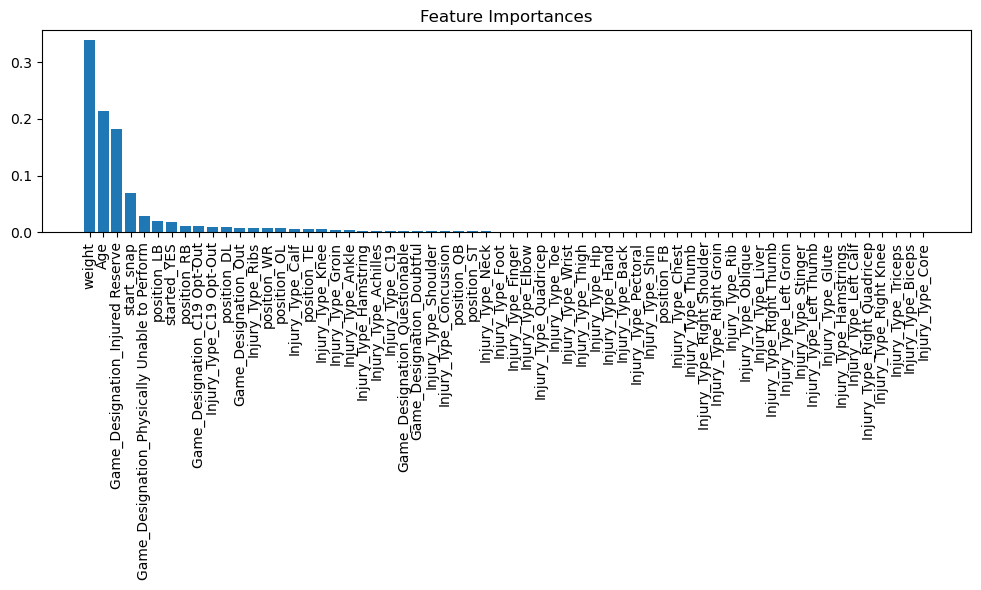

In [484]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


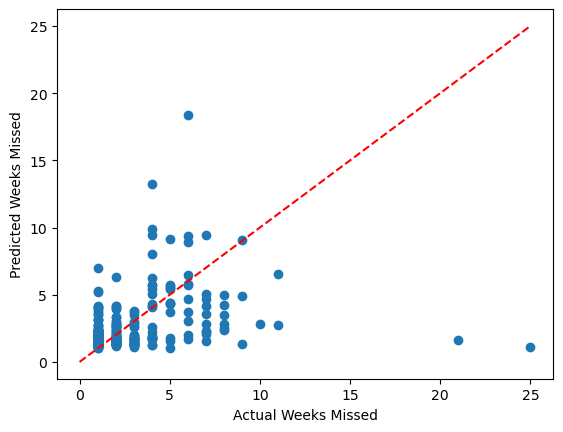

In [450]:
plt.scatter(y_test, preds)
plt.xlabel("Actual Weeks Missed")
plt.ylabel("Predicted Weeks Missed")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')  # perfect prediction line
plt.show()


In [454]:
y_test.mean()

np.float64(2.5316455696202533)